# DBSCAN
density-based spatial clustering of applications with noise

https://www.youtube.com/watch?v=2eDFjw456AM&ab_channel=StatsWire

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [10]:
df = pd.read_csv("Mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
df.shape

(200, 5)

In [11]:
df = df.iloc[:, [3,4]].values

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [18]:
df[:6].view()

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76]], dtype=int64)

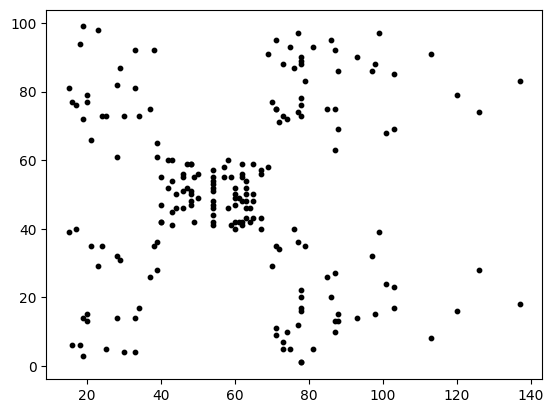

In [13]:
plt.scatter(df[:,0], df[:,1], s=10, c="black")

### K-means

In [28]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,
                    init = "k-means++", 
                    max_iter = 300,
                    n_init = 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

inertia_ is kmeans cost function, which returns the sum of squared distances of samples to their closest cluster center.

#### The Elbow Method
The Elbow Method is one of the most popular methods to determine this optimal value of k.  

此種方法適用於K值相對較小的情況，當選擇的k值小於真正的時，k每增加1，cost值就會大幅的減小；當選擇的k值大於真正的K時，k每增加1，cost值的變化就不會那麼明顯。這樣，正確的k值就會在這個轉捩點，類似elbow的地方

Text(0, 0.5, 'WCSS')

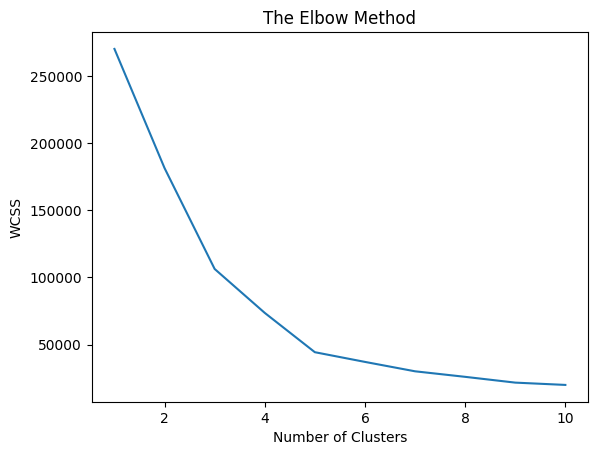

In [29]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

### DBSCAN

In [33]:
dbscan = DBSCAN(eps = 5, min_samples = 5)

dbscan.fit_predict is used to find the clusters, fit is used to train the model

In [35]:
labels = dbscan.fit_predict(df)

In [36]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

-1 in labels means noise

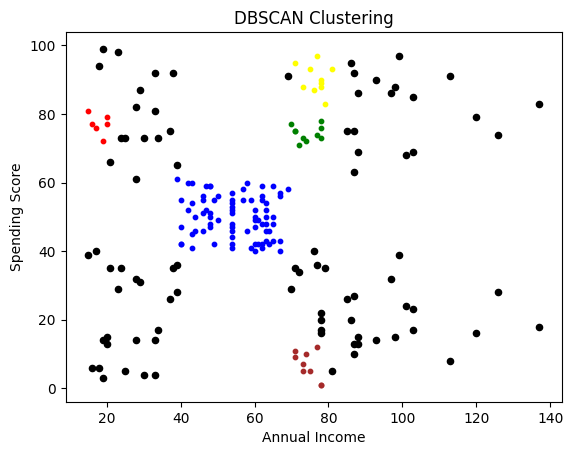

In [39]:
plt.scatter(df[labels==-1,0], df[labels==-1,1],
            s=20, c="black")
plt.scatter(df[labels==0,0], df[labels==0,1],
           s = 10, c="red")
plt.scatter(df[labels==1,0], df[labels==1,1],
           s = 10, c="blue")
plt.scatter(df[labels==2,0], df[labels==2,1],
           s = 10, c="green")
plt.scatter(df[labels==3,0], df[labels==3,1],
           s = 10, c="brown")
plt.scatter(df[labels==4,0], df[labels==4,1],
           s = 10, c="yellow")

plt.title("DBSCAN Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [46]:
unique_labels = set(labels)
print(f"Cluster label is: {unique_labels}")
colors = ['red', 'blue', 'green', 'brown', 'yellow', 'black']
print(f"Cluster label and color is: {list(zip(unique_labels, colors))}")

Cluster label is: {0, 1, 2, 3, 4, -1}
Cluster label and color is: [(0, 'red'), (1, 'blue'), (2, 'green'), (3, 'brown'), (4, 'yellow'), (-1, 'black')]


#### Another plot from chat

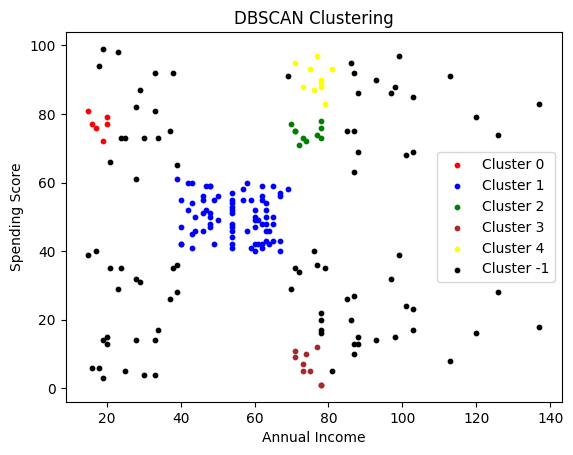

In [47]:
for label, color in zip(unique_labels, colors):
    plt.scatter(df[labels == label, 0], df[labels == label, 1], s=10, c=color, label=f'Cluster {label}')

plt.title("DBSCAN Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()